In [74]:
# Specify the file path
file_path = 'output.txt'

# Open the file and read it line by line
lines = []

with open(file_path, 'r') as file:
    for line in file:
        # Process each line as needed
        line.strip()
        lines.append(float(line.split(":")[1].strip().split(" ")[0]))

print(lines)


[2.82e-05, 1.79e-05, 2028830.0, 2028830.0, 7.53e-05, 3.98e-05, 4053010.0, 4053010.0, 9.76e-05, 6.34e-05, 8099770.0, 8099770.0, 0.0001694, 0.0001181, 16200200.0, 16200200.0, 0.0003403, 0.00029, 32413700.0, 32413700.0, 0.0006767, 0.0005859, 64794300.0, 64794300.0, 0.001341, 0.0011331, 129493000.0, 129493000.0, 0.0026805, 0.0023092, 257330000.0, 257330000.0, 0.005411, 0.0046935, 501372000.0, 501372000.0, 0.0108031, 0.0093348, 916356000.0, 916356000.0, 1.45e-05, 5e-06, 2021740.0, 2021740.0, 3.49e-05, 9.8e-06, 4058270.0, 4058270.0, 7.46e-05, 1.91e-05, 8107240.0, 8107240.0, 0.0001565, 3.83e-05, 16185800.0, 16185800.0, 0.0002001, 6.7e-05, 32385300.0, 32385300.0, 0.0004928, 0.0002216, 64776500.0, 64776500.0, 0.0014577, 0.0004648, 129694000.0, 129694000.0, 0.0009741, 0.0010258, 259199000.0, 259199000.0, 0.0017408, 0.0018406, 518419000.0, 518419000.0, 0.0016062, 0.0033691, 1036410000.0, 1036410000.0, 5.2e-06, 5.4e-06, 2026160.0, 2026160.0, 5e-06, 5.3e-06, 4049960.0, 4049960.0, 5e-06, 5.6e-06, 81

In [75]:
time_sep = lines[::4]
time_combined = lines[1::4]
size = len(lines)
print(size)

time_sep_cpu = lines[:int(size/4):4]
time_sep_openmp = lines[int(size/4):int(size/2):4]
time_sep_opencl = lines[int(size/2):int(size*3/4):4]
time_sep_cuda = lines[int(size*3/4)::4]
print(time_sep_cpu)
print(time_sep_openmp)
time_combined_cpu = []
time_combined_openmp = []
time_combined_opencl = []
time_combined_cuda = []


160
[2.82e-05, 7.53e-05, 9.76e-05, 0.0001694, 0.0003403, 0.0006767, 0.001341, 0.0026805, 0.005411, 0.0108031]
[1.45e-05, 3.49e-05, 7.46e-05, 0.0001565, 0.0002001, 0.0004928, 0.0014577, 0.0009741, 0.0017408, 0.0016062]


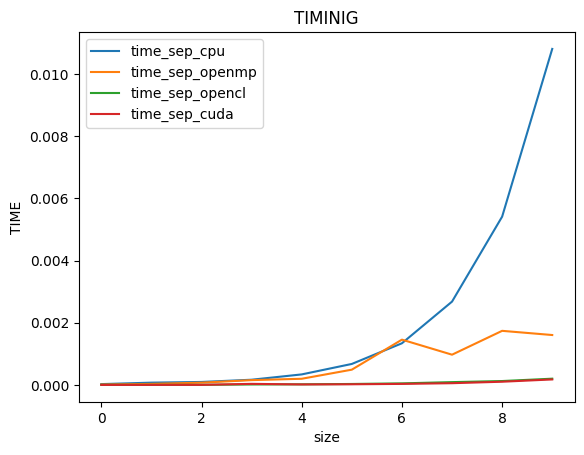

In [76]:
import matplotlib.pyplot as plt


plt.plot(time_sep_cpu, label='time_sep_cpu')
plt.plot(time_sep_openmp, label='time_sep_openmp')
plt.plot(time_sep_opencl, label='time_sep_opencl')
plt.plot(time_sep_cuda, label='time_sep_cuda')

# Adding labels and title
plt.xlabel('size')
plt.ylabel('TIME')
plt.title('TIMINIG')

# Adding legend
plt.legend()

# Display the plot
plt.show()

In [26]:
#for average

# Specify the file path
file_path = 'output_q21.txt'

# Open the file and read it line by line
lines = []

with open(file_path, 'r') as file:
    for line in file:
        # Process each line as needed
        line.strip()
        lines.append(float(line.split(":")[1].strip().split(" ")[0]))

print(lines)

size = len(lines)
print(size)
time_cpu = lines[:int(size/4)]
time_openmp = lines[int(size/4):int(size/2)]
time_opencl = lines[int(size/2):int(size*3/4)]
time_cuda = lines[int(size*3/4):]

size = len(time_cpu)

print(size)

time_comb_av_cpu = time_cpu[::3]
time_sep_av_cpu = time_cpu[1::3]
time_sep_gauss_cpu = time_cpu[2::3]

time_comb_av_openmp = time_openmp[::3]
time_sep_av_openmp = time_openmp[1::3]
time_sep_gauss_openmp = time_openmp[2::3]

time_comb_av_opencl = time_opencl[::3]
time_sep_av_opencl = time_opencl[1::3]
time_sep_gauss_opencl = time_opencl[2::3]

time_comb_av_cuda = time_cuda[1::3]
time_sep_av_cuda = time_cuda[::3]
time_sep_gauss_cuda = time_cuda[2::3]

[0.0343062, 0.0168186, 0.0101749, 0.0905532, 0.0225587, 0.0150462, 0.285125, 0.0284191, 0.0213167, 1.00942, 0.0458203, 0.0430583, 3.82048, 0.0790276, 0.0783661, 0.0189915, 0.0065122, 0.0058029, 0.027159, 0.0118692, 0.005958, 0.0513852, 0.0097734, 0.0094975, 0.177783, 0.0211382, 0.0114043, 0.646528, 0.0183458, 0.0179995, 0.0014497, 0.0003145, 0.000247, 0.0024173, 0.0003613, 0.000352, 0.0015321, 0.0003628, 0.0005693, 0.0025106, 0.0004675, 0.0009717, 0.0027308, 0.0004696, 0.0018012, 0.0003638, 0.0003513, 0.0002628, 0.0004951, 0.0003968, 0.0003751, 0.0005114, 0.000381, 0.0005533, 0.0003727, 0.0012855, 0.0009751, 0.0003508, 0.0069211, 0.0017857]
60
15


[0.0343062, 0.0905532, 0.285125, 1.00942, 3.82048]


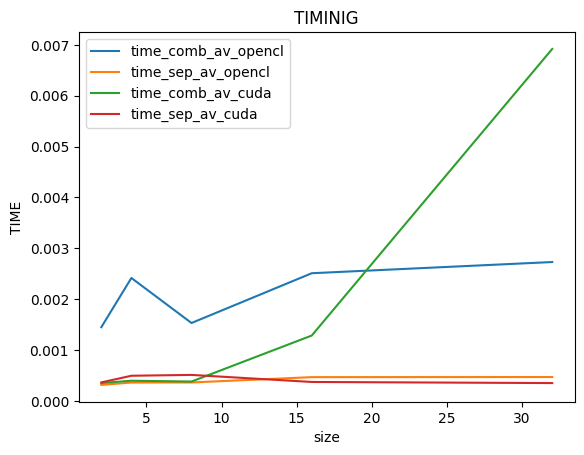

In [27]:
import matplotlib.pyplot as plt

x = [2, 4, 8, 16, 32]

print(time_comb_av_cpu)

#plt.plot(x,time_comb_av_cpu,   label='time_comb_av_cpu')
#plt.plot(x,time_sep_av_cpu, label='time_sep_av_cpu')

#plt.plot(x,time_comb_av_openmp, label='time_comb_av_openmp')
#plt.plot(x,time_sep_av_openmp, label='time_sep_av_openmp')

plt.plot(x,time_comb_av_opencl, label='time_comb_av_opencl')
plt.plot(x,time_sep_av_opencl, label='time_sep_av_opencl')

plt.plot(x,time_comb_av_cuda, label='time_comb_av_cuda')
plt.plot(x,time_sep_av_cuda, label='time_sep_av_cuda')

#plt.plot(time_sep_gauss_cpu, label='time_sep_gauss_cpu')
#plt.plot(time_sep_gauss_openmp, label='time_sep_gauss_openmp')
#plt.plot(time_sep_gauss_opencl, label='time_sep_gauss_opencl')
#plt.plot(time_sep_gauss_cuda, label='time_sep_gauss_cuda')

plt.xlabel('size')
plt.ylabel('TIME')
plt.title('TIMINIG')

plt.legend()

plt.show()

In [8]:
file_path = 'output_q31.txt'

# Open the file and read it line by line
lines = []

with open(file_path, 'r') as file:
    for line in file:
        # Process each line as needed
        line.strip()
        lines.append(float(line.split(":")[1].strip().split(" ")[0]))

print(lines)

size = len(lines)
print(size)
time_cpu = lines[:int(size/4)]
time_openmp = lines[int(size/4):int(size/2)]
time_opencl = lines[int(size/2):int(size*3/4)]
time_cuda = lines[int(size*3/4):]



[0.0549473, 0.421086, 3.85634, 0.0104999, 0.0391121, 0.358572, 0.0003524, 0.0003171, 0.0003034, 0.0002768, 0.000288, 0.0002509]
12


[0.0003524, 0.0003171, 0.0003034]
[0.0042899, 0.0112081, 0.0350335, 0.125657, 0.465522]


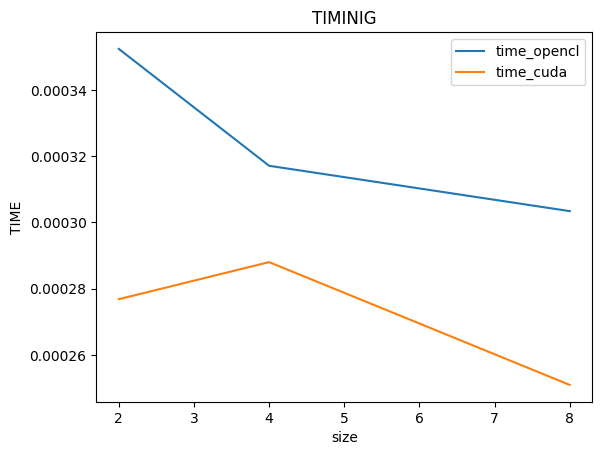

In [13]:
import matplotlib.pyplot as plt

x = [2, 4, 8]

print(time_comb_av_cpu)

plt.plot(x,time_cpu,   label='time_cpu')
plt.plot(x,time_openmp, label='time_openmp')

plt.plot(x,time_opencl, label='time_opencl')
plt.plot(x,time_cuda, label='time_cuda')


plt.xlabel('size')
plt.ylabel('TIME')
plt.title('TIMINIG')

plt.legend()

plt.show()